In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.outliers import Winsorizer

## clean data

In [5]:
house_data = pd.read_csv('../data/train.csv').drop("Id", axis=1)
test_data = pd.read_csv('../data/test.csv').drop("Id", axis=1)
submission = pd.read_csv('../data/sample_submission.csv')

In [6]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
xs = house_data.iloc[:, :-1]
y = house_data['SalePrice']

In [8]:
xs.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
Heating             0
MSZoning            0
CentralAir          0
1stFlrSF            0
SaleCondition       0
Length: 79, dtype: int64

In [9]:
xs.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [11]:
num_cols = xs.select_dtypes(include=[int, float]).columns
str_cols = xs.select_dtypes(include=object).columns

In [12]:
xs[num_cols].isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [13]:
xs[str_cols].isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [14]:
cat_impute = CategoricalImputer(fill_value="None",
                                variables=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
                                           'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2',
                                           'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'Electrical'])

num_impute = ArbitraryNumberImputer(arbitrary_number=0,
                                    variables=['LotFrontage',
                                               'GarageYrBlt',
                                               'MasVnrArea',
                                               ])

cat_impute.fit(xs)
num_impute.fit(xs)

ArbitraryNumberImputer(arbitrary_number=0,
                       variables=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'])

In [15]:
xs = num_impute.transform(cat_impute.transform(xs))
test_data = num_impute.transform(cat_impute.transform(test_data))

In [17]:
xs.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [18]:
test_data.isna().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 79, dtype: int64

In [20]:
test_data[num_cols].isna().sum().sort_values(ascending=False)

BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
Fireplaces       0
GarageYrBlt      0
WoodDeckSF       0
MSSubClass       0
KitchenAbvGr     0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
TotRmsAbvGrd     0
FullBath         0
BedroomAbvGr     0
HalfBath         0
LotFrontage      0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
YrSold           0
dtype: int64

In [21]:
test_data[num_cols] = test_data[num_cols].fillna(0)
test_data[str_cols] = test_data[str_cols].fillna('None')

test_data.isna().sum().sort_values(ascending=False)

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SaleCondition    0
Length: 79, dtype: int64

## data preprocessing

### outliers

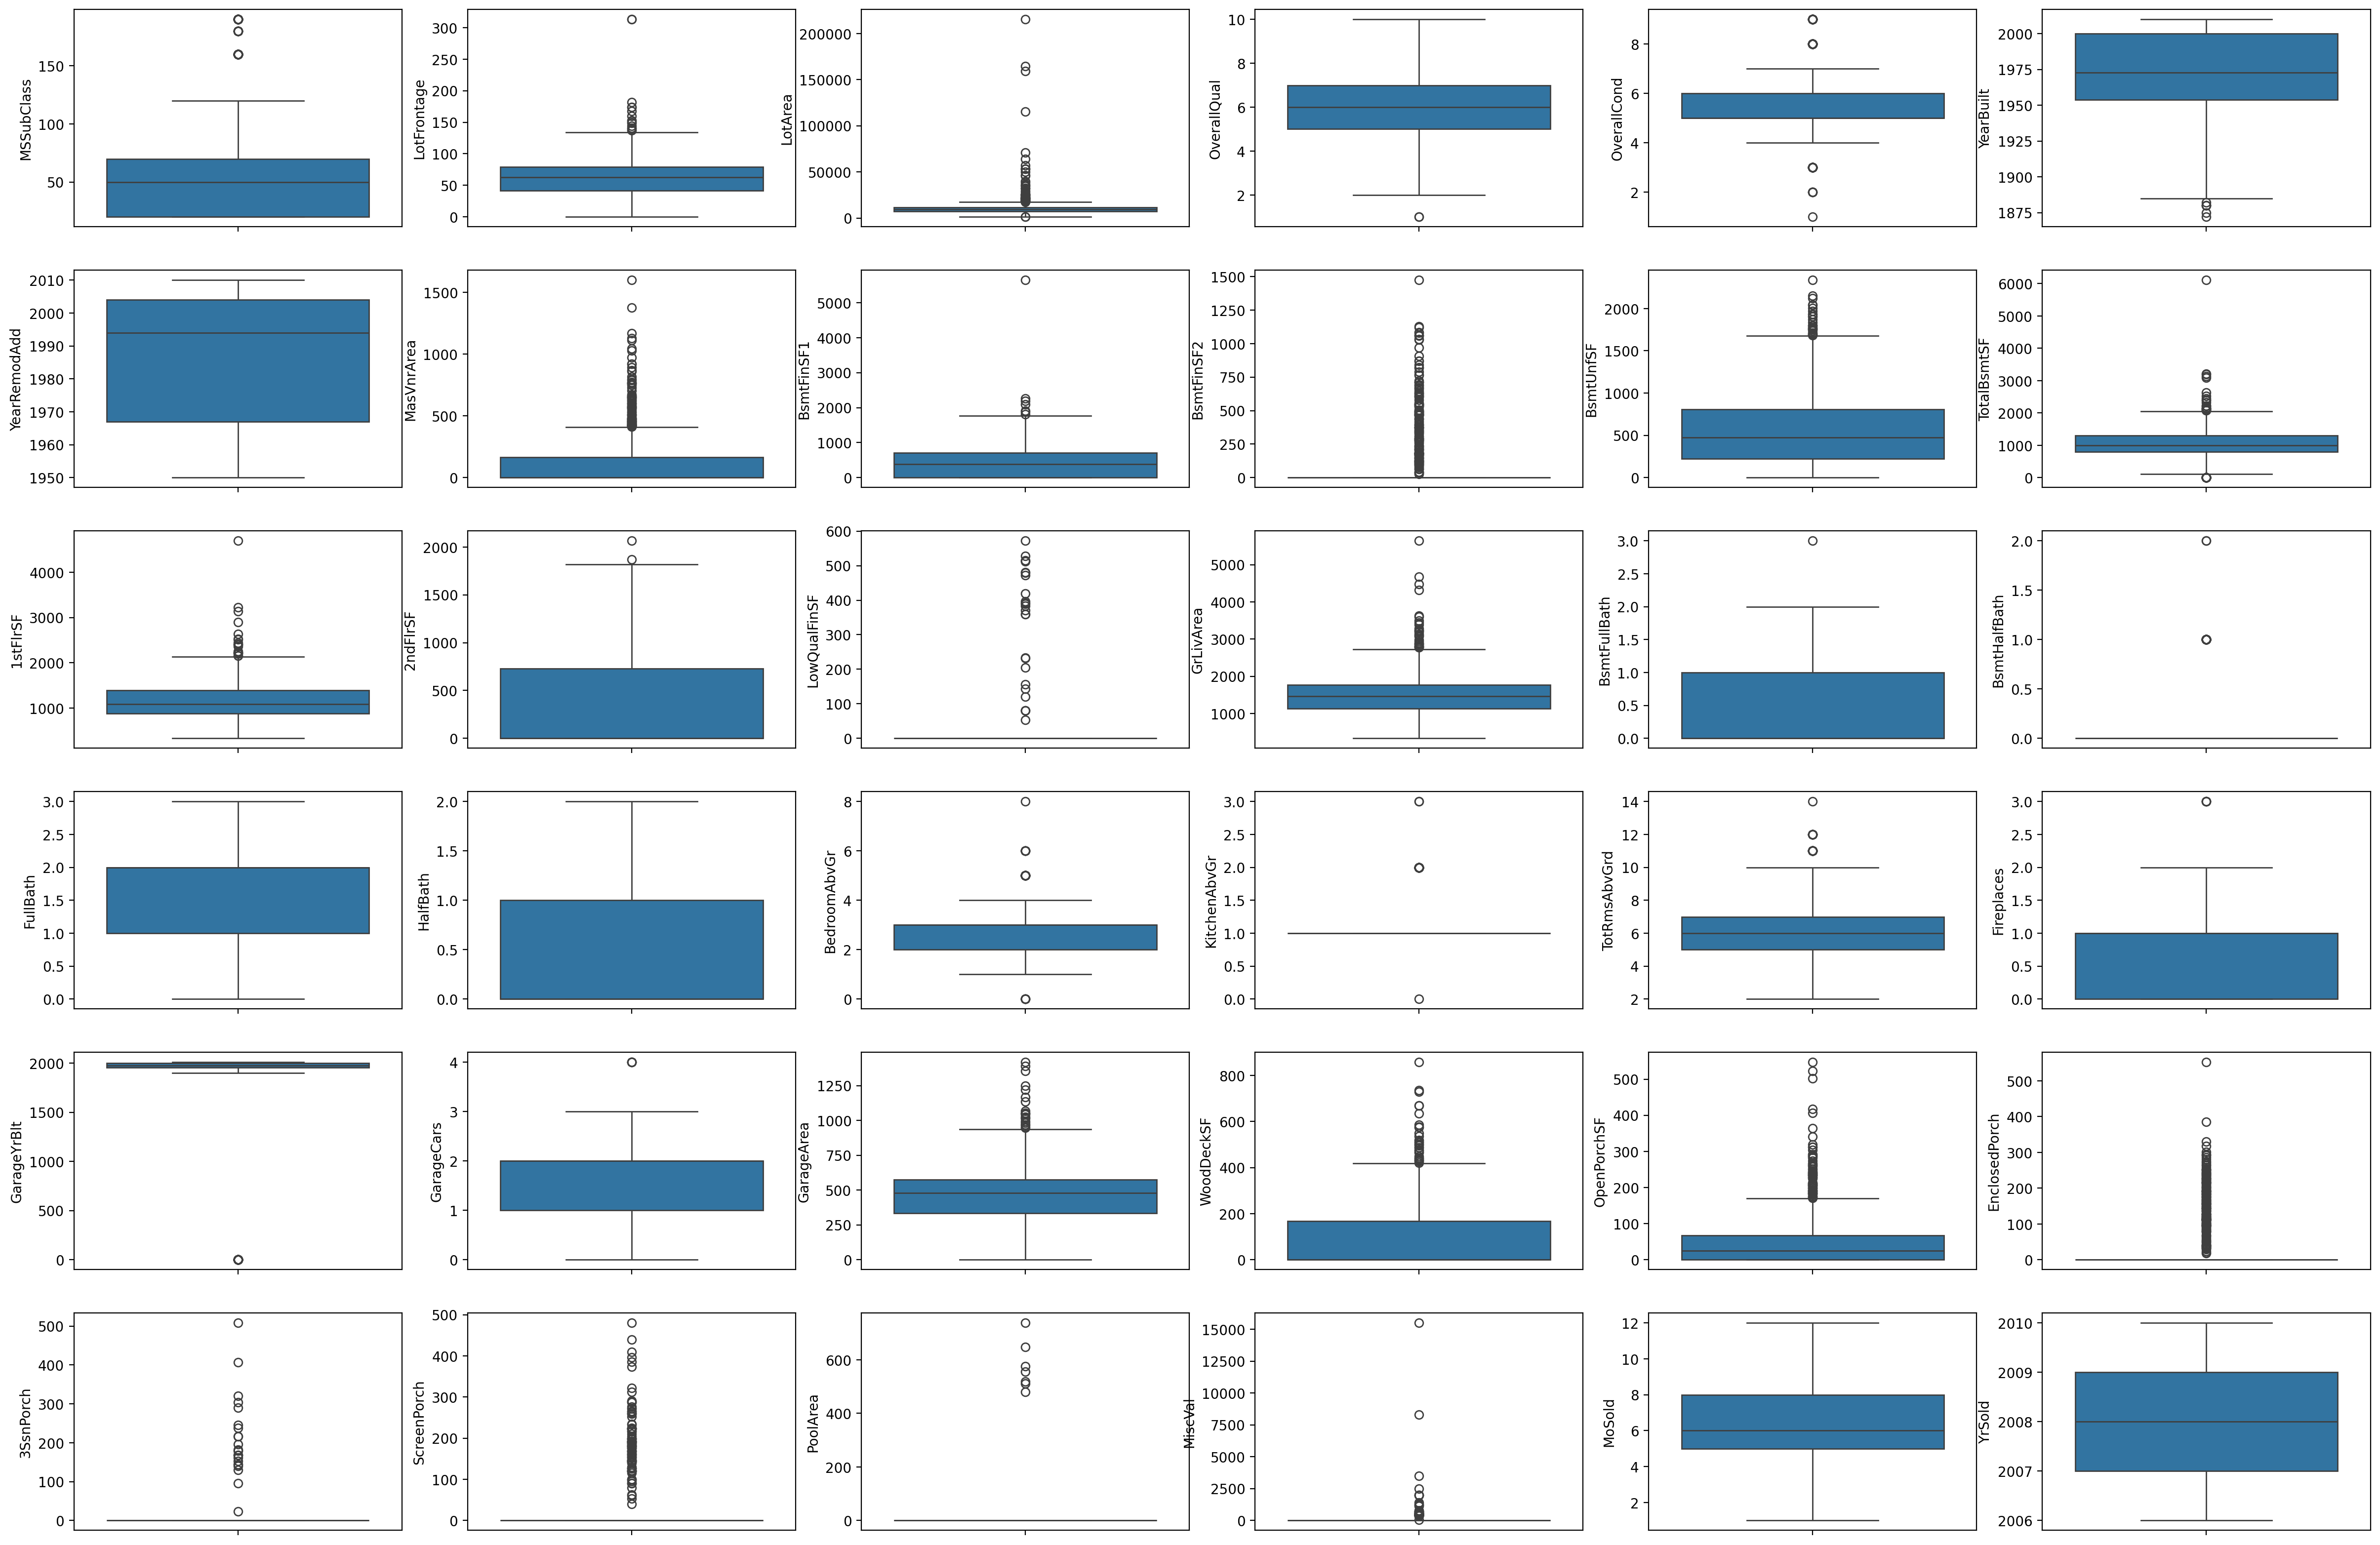

In [26]:
fig, axs = plt.subplots(6, 6, figsize=(30, 20), dpi=200)
axs = axs.ravel()

for i, col in enumerate(list(num_cols)):
    sns.boxplot(xs[col], ax=axs[i])

plt.show()

In [29]:
xs[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [33]:
outlier = Winsorizer(tail='both',
                     variables=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                                'MiscVal'])

outlier.fit(xs)

Winsorizer(tail='both',
           variables=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                      'ScreenPorch', 'PoolArea', 'MiscVal'])

In [35]:
xs = outlier.transform(xs)
test_data = outlier.transform(test_data)

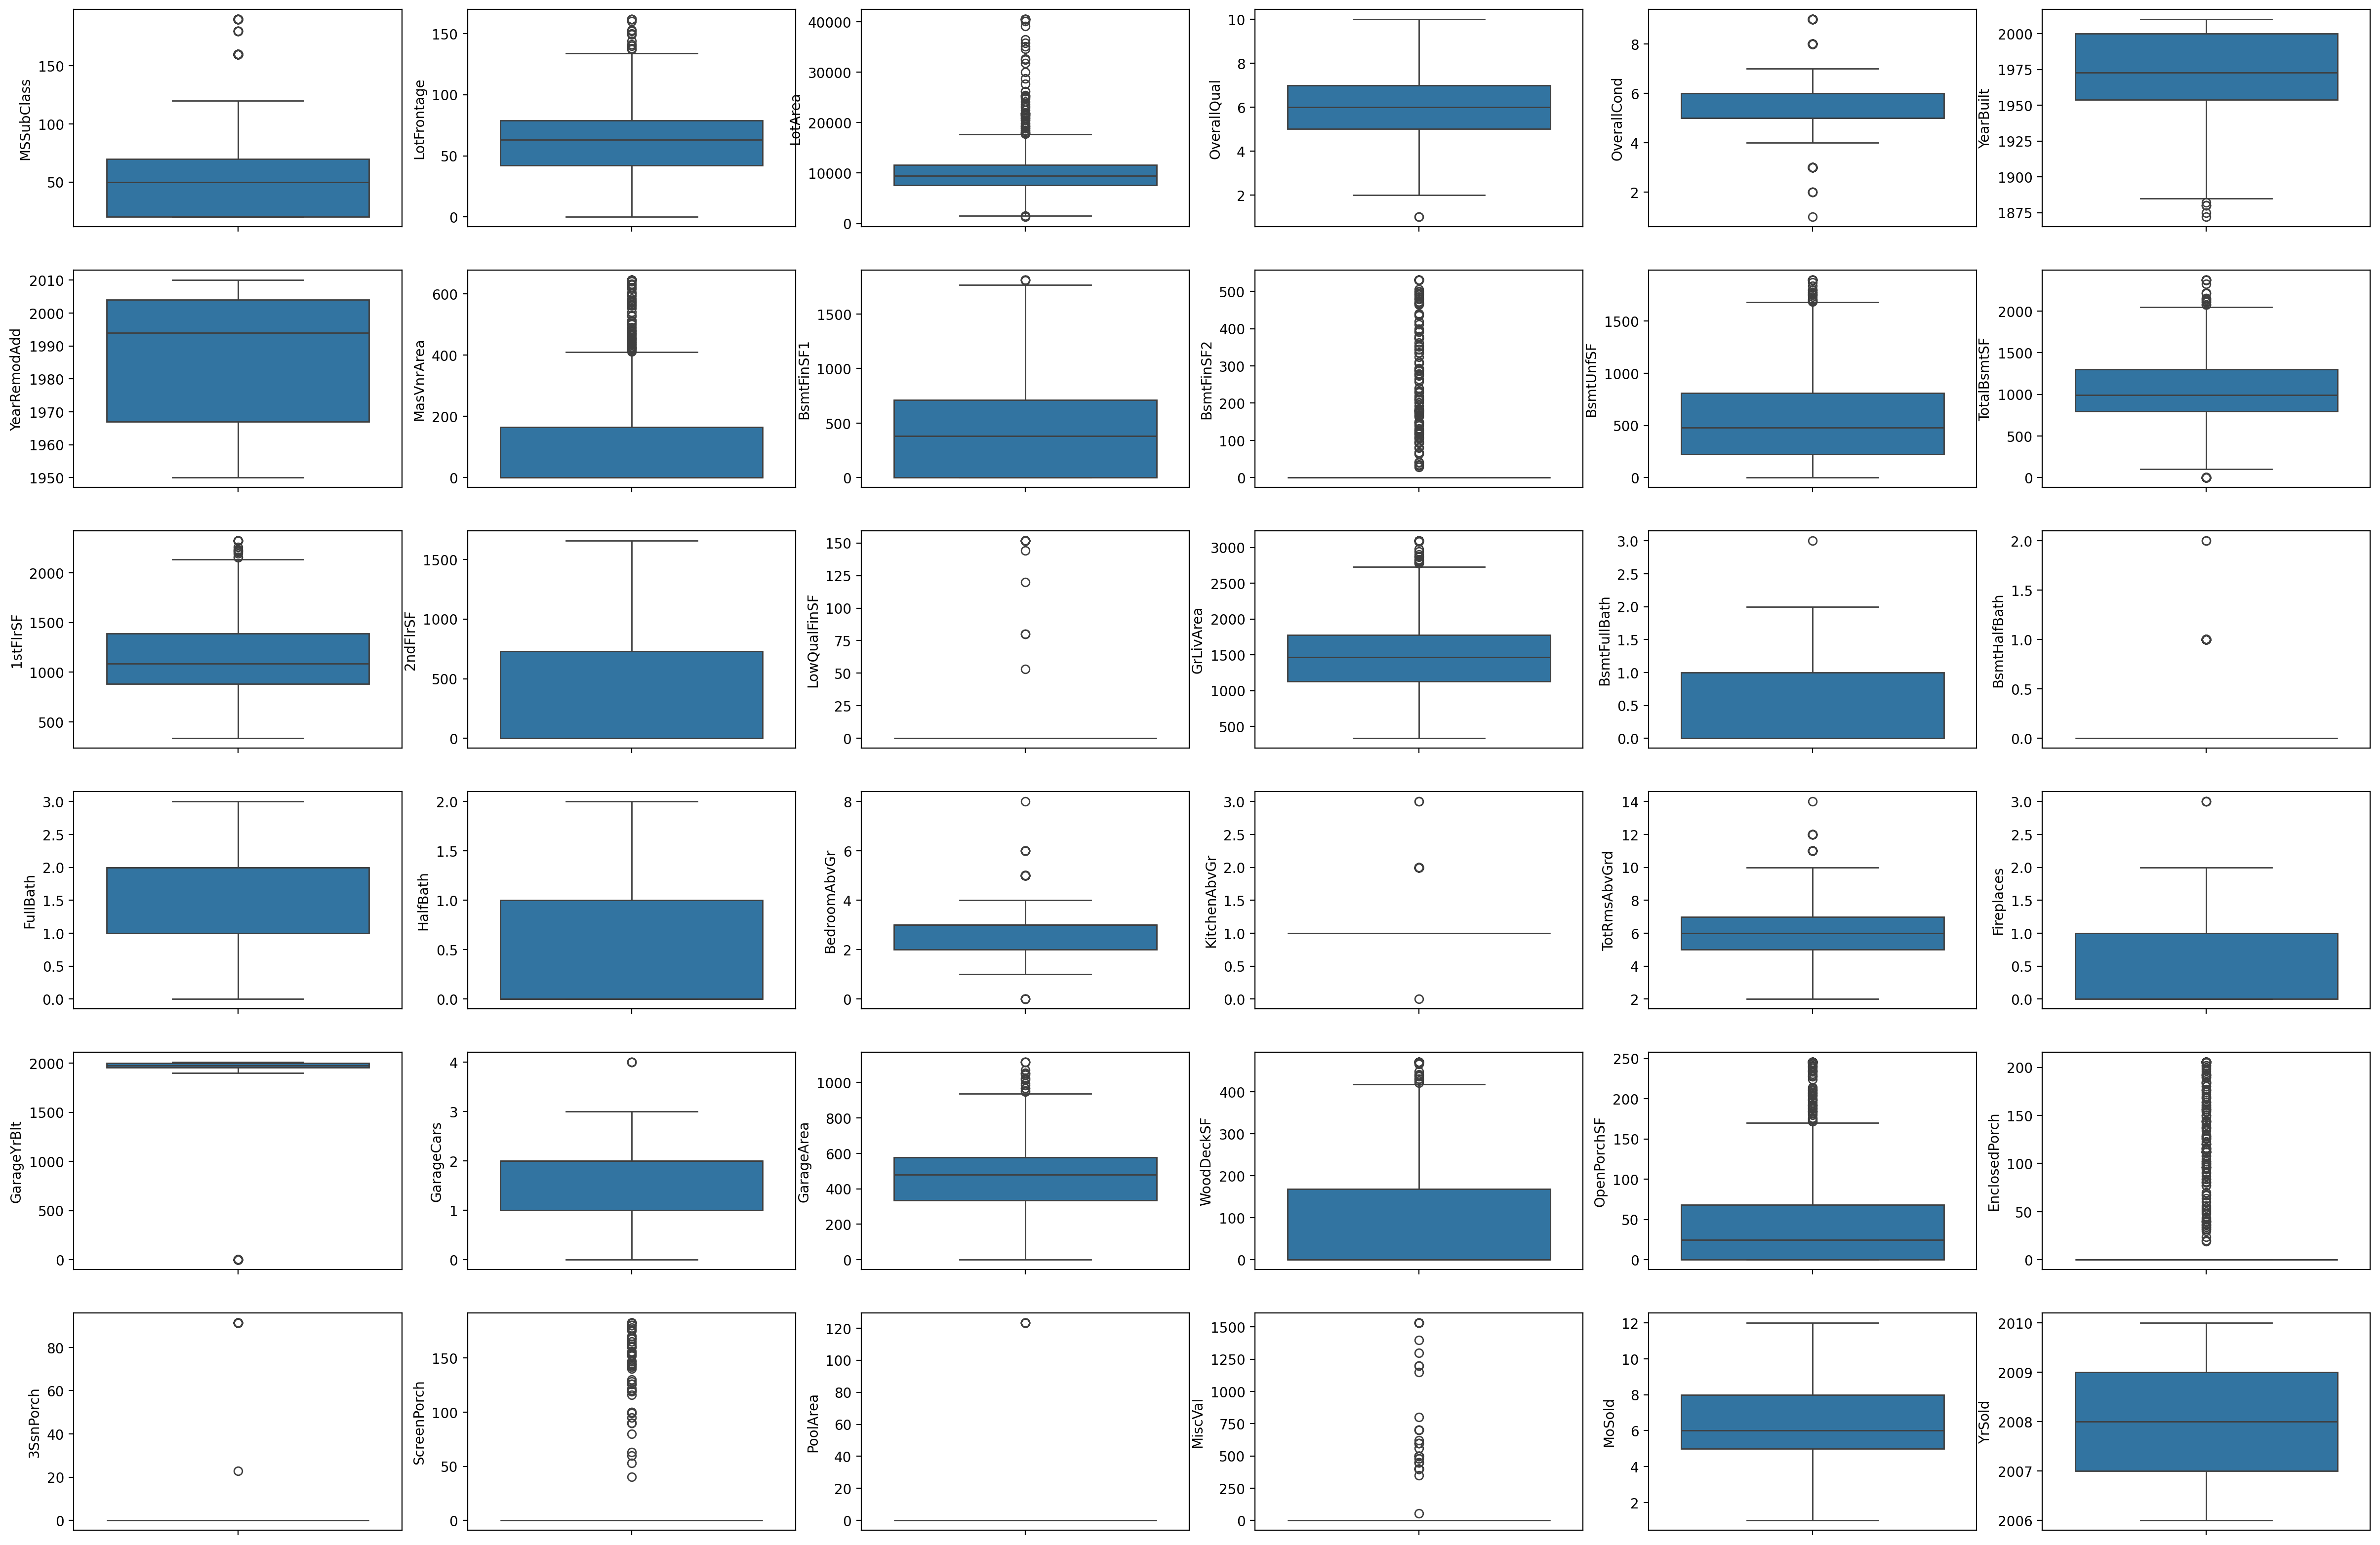

In [36]:
fig, axs = plt.subplots(6, 6, figsize=(30, 20), dpi=200)
axs = axs.ravel()

for i, col in enumerate(list(num_cols)):
    sns.boxplot(xs[col], ax=axs[i])

plt.show()

### scaling / standardization

C:\ProgramData\anaconda3\envs\HousePrice\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\envs\HousePrice\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\envs\HousePrice\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\envs\HousePrice\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\env

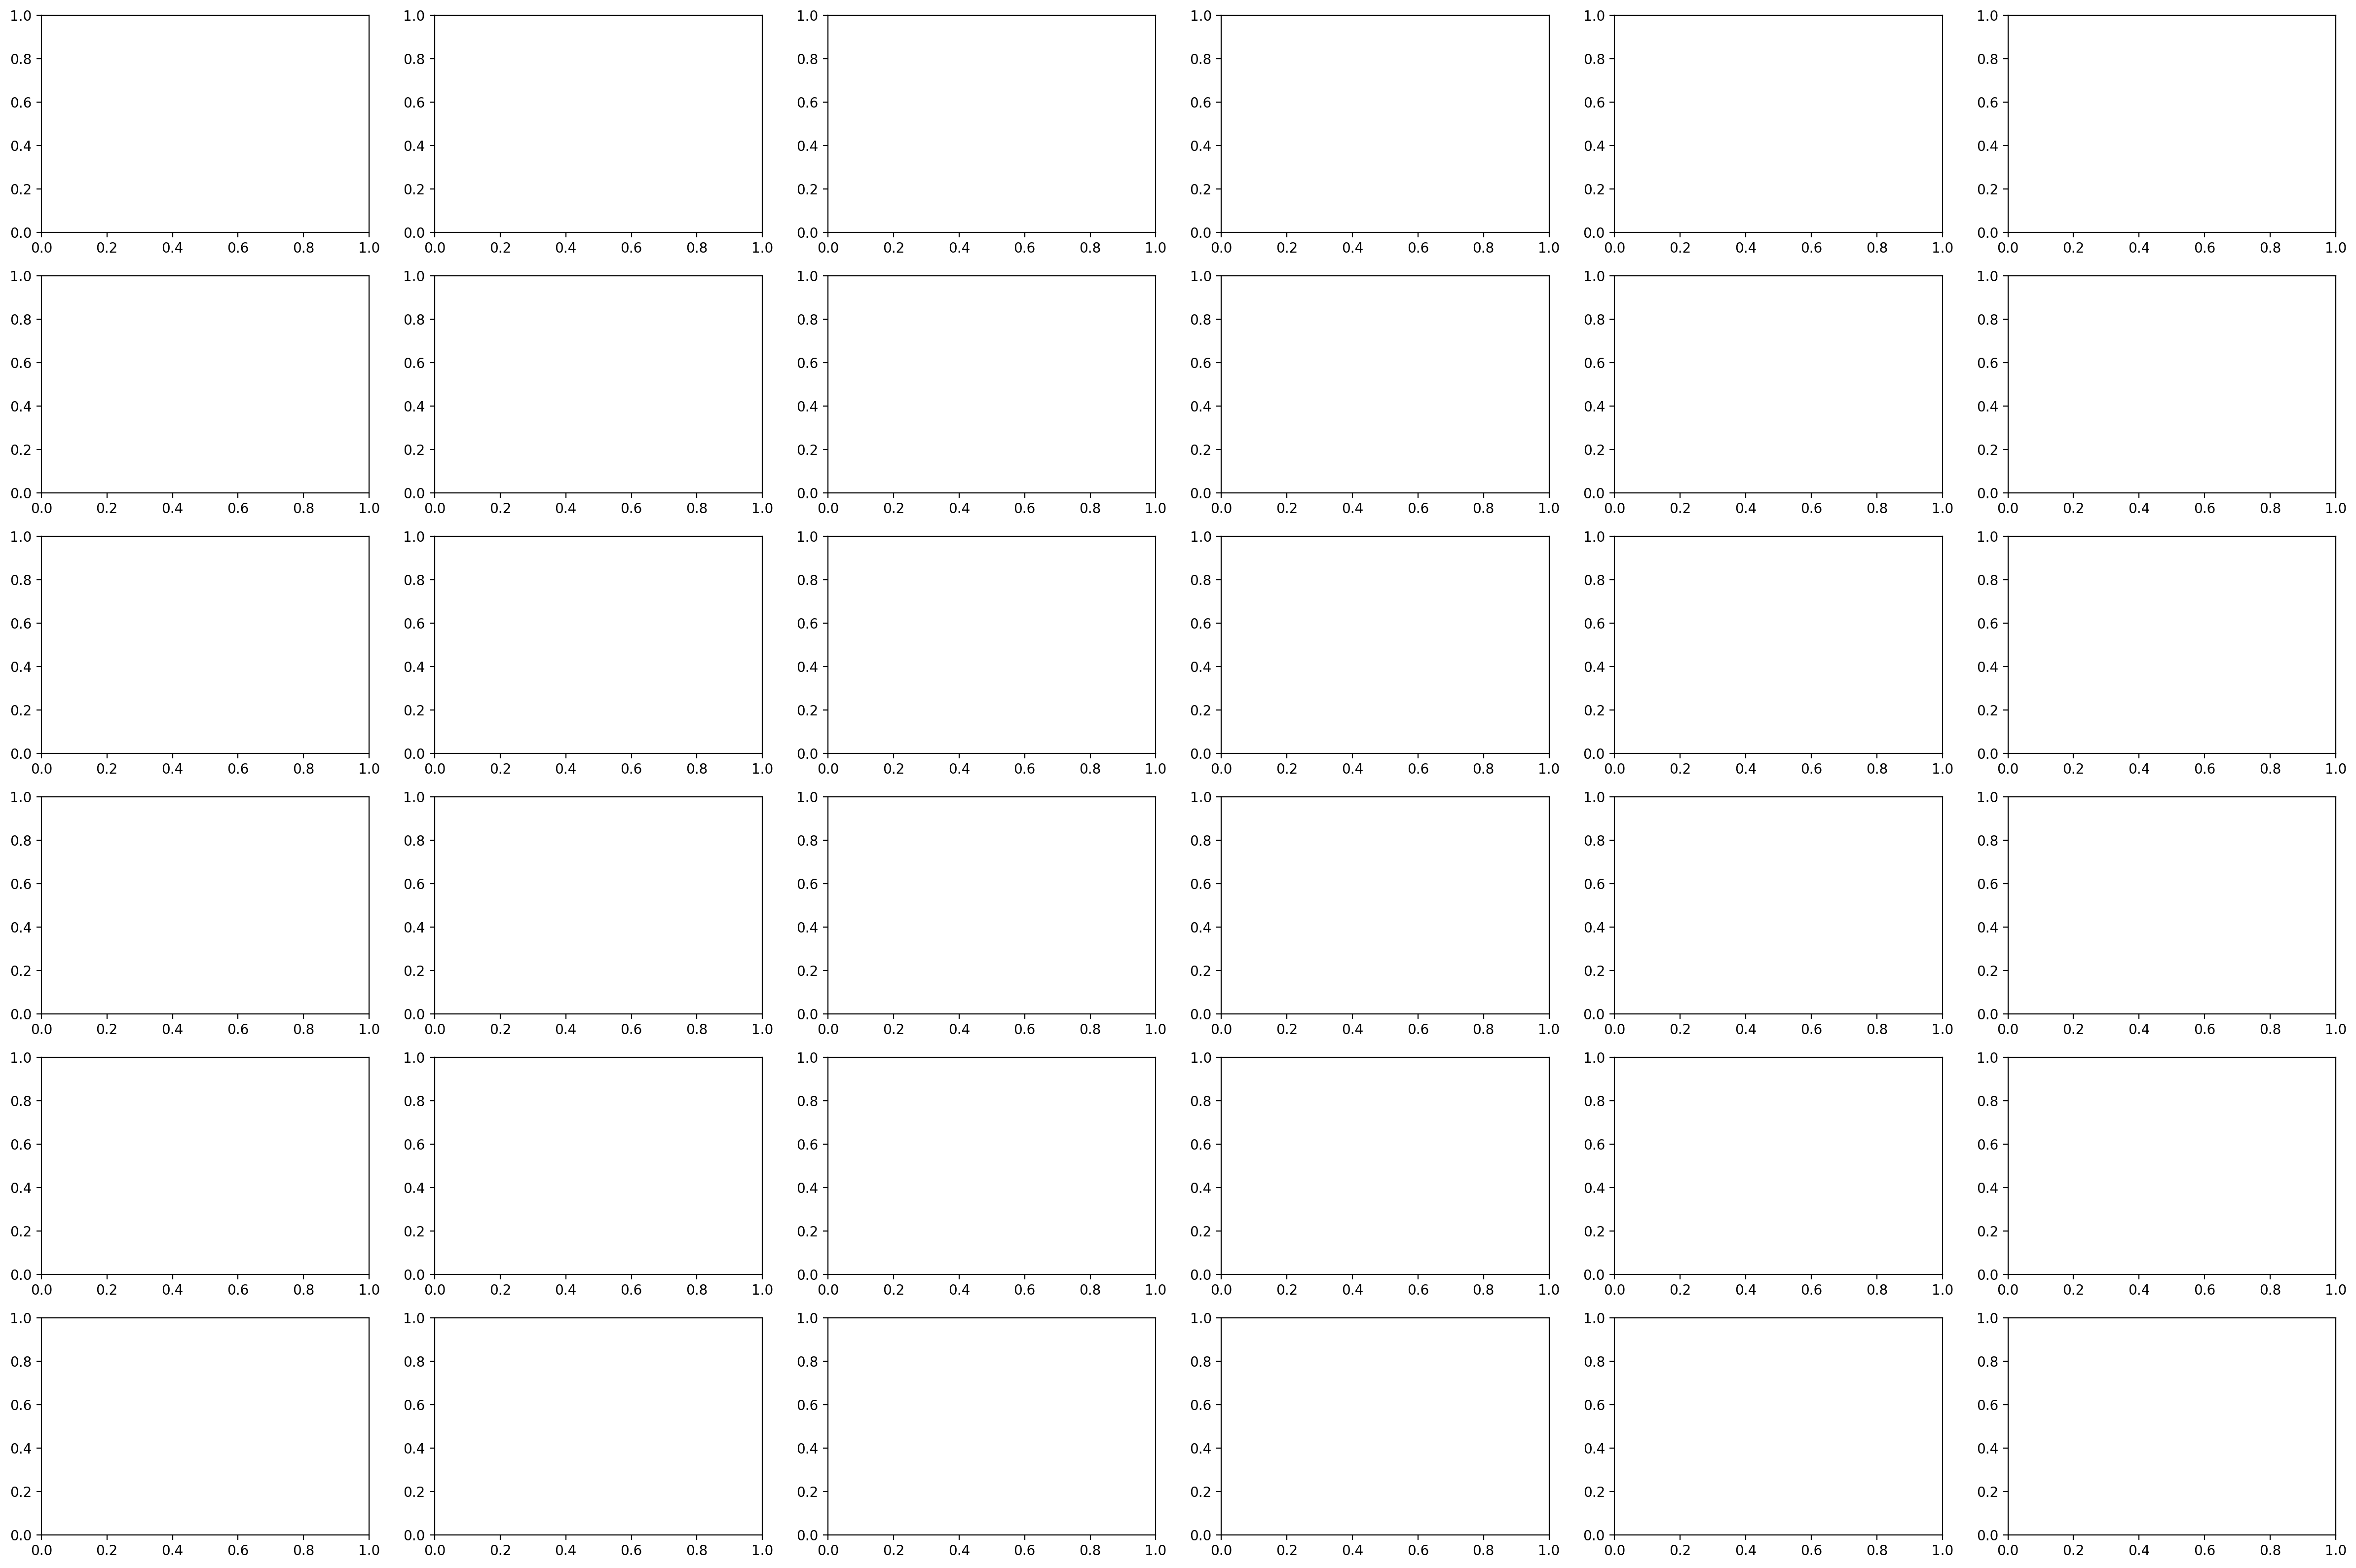

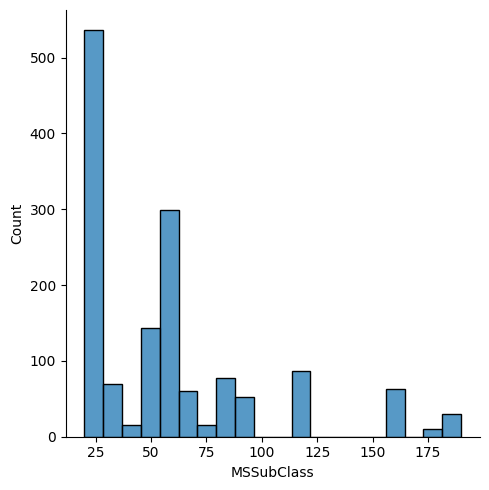

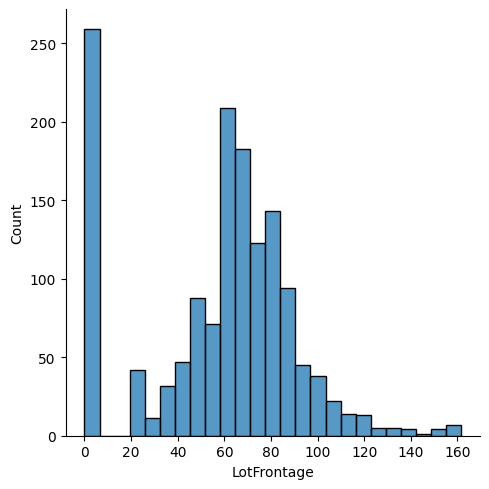

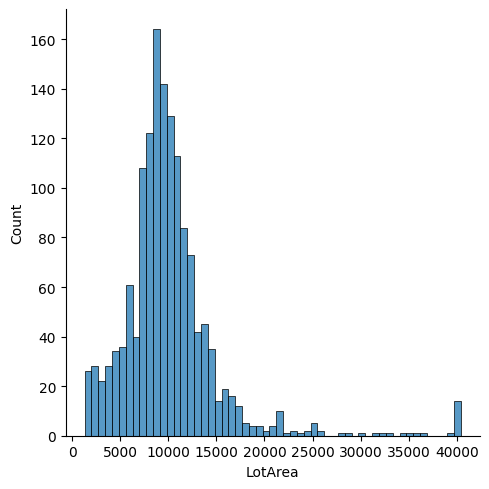

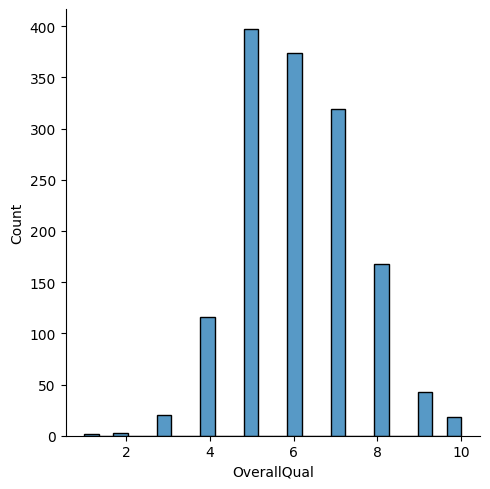

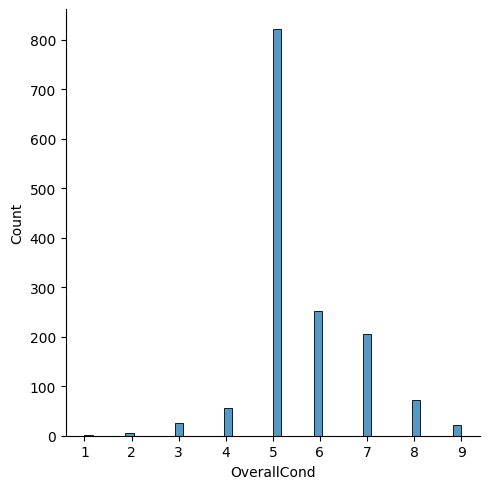

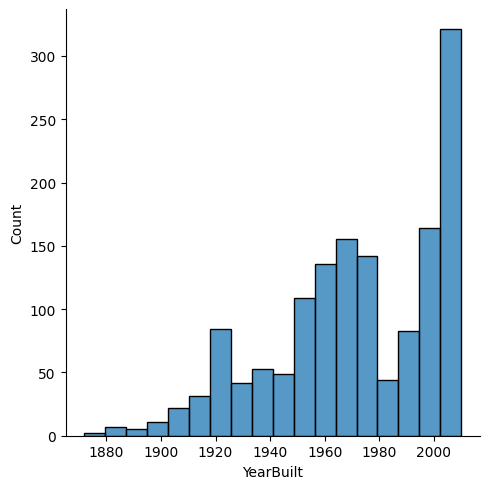

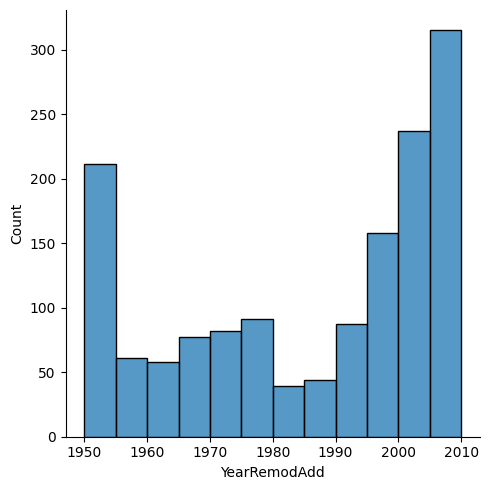

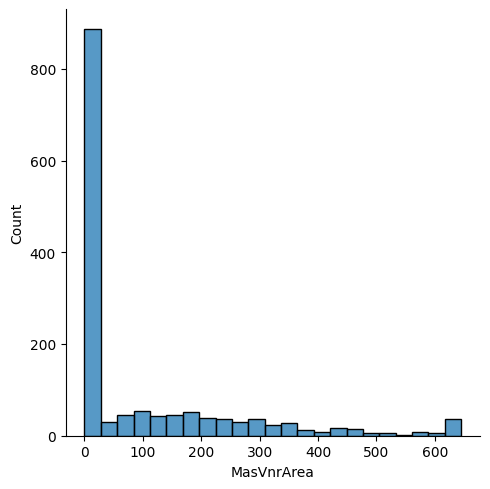

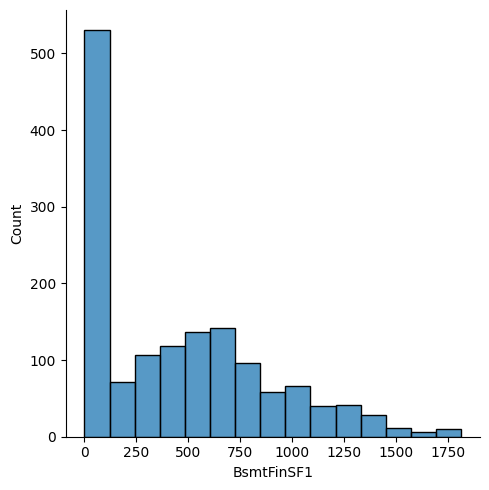

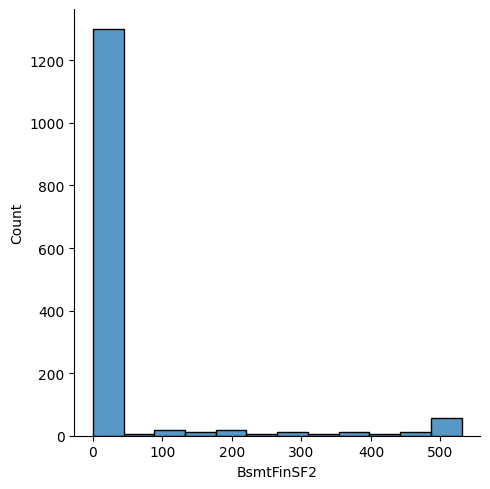

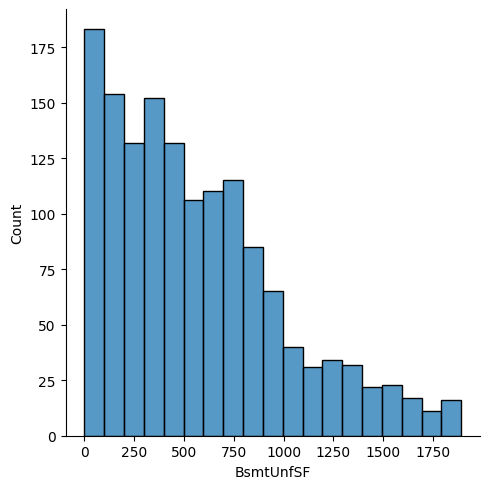

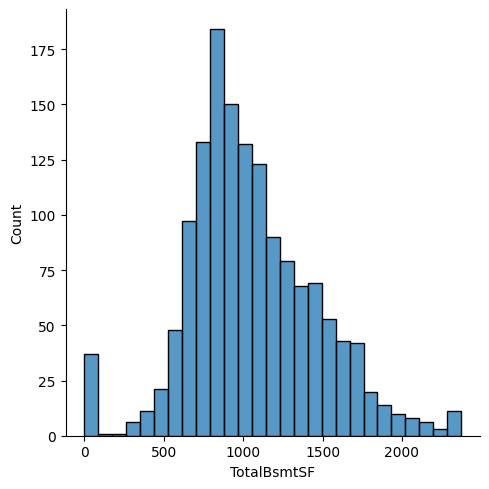

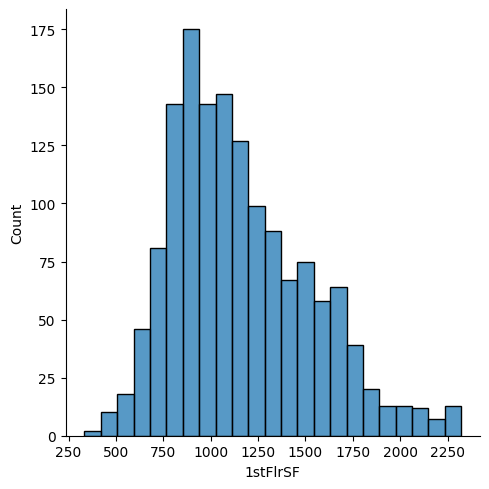

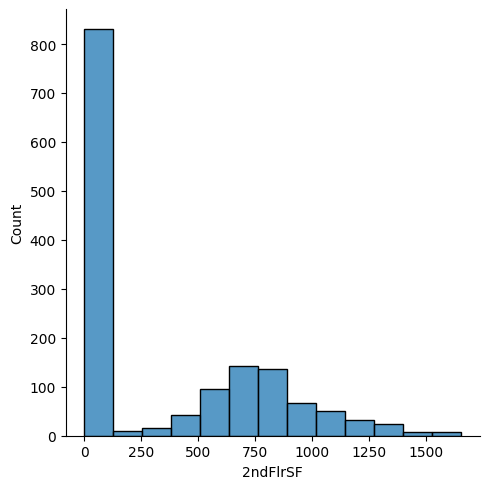

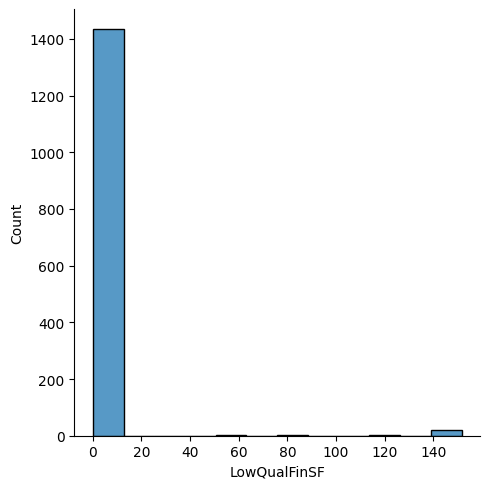

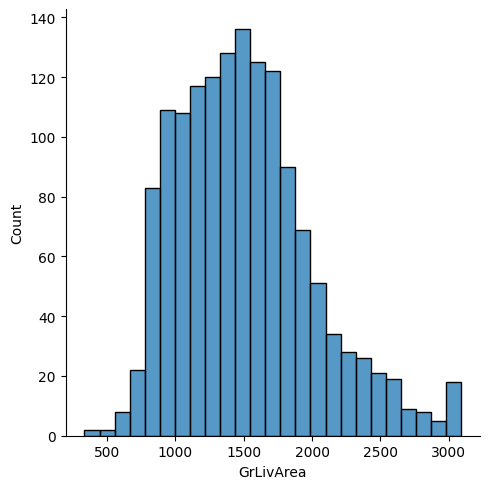

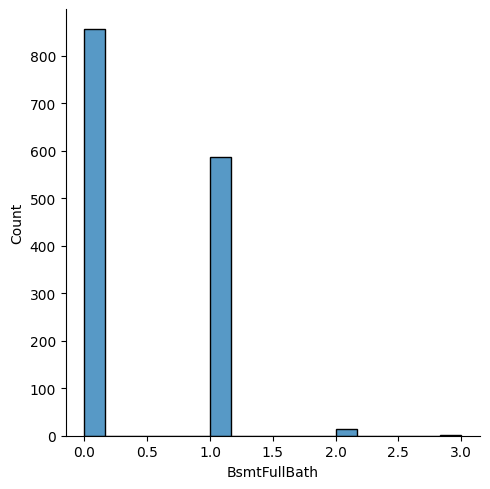

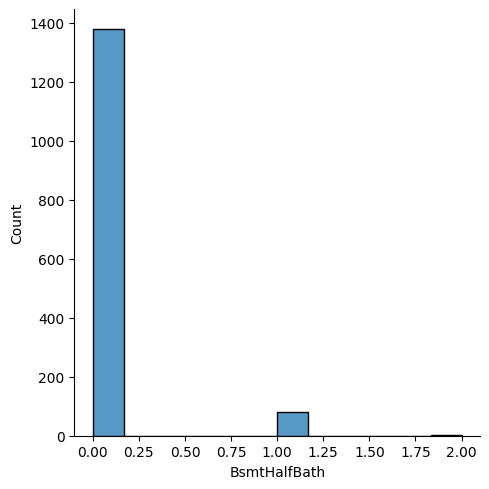

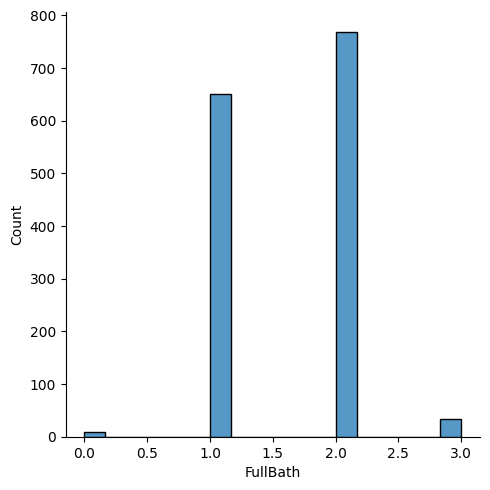

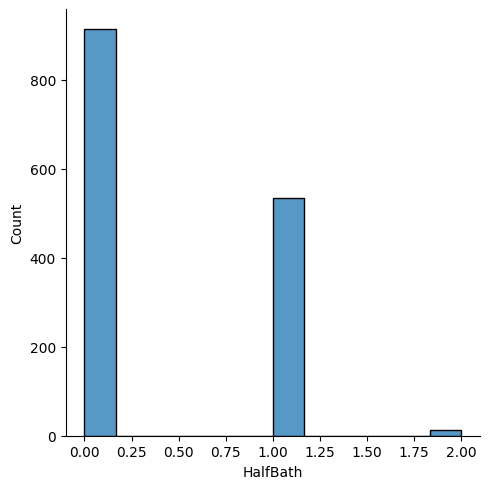

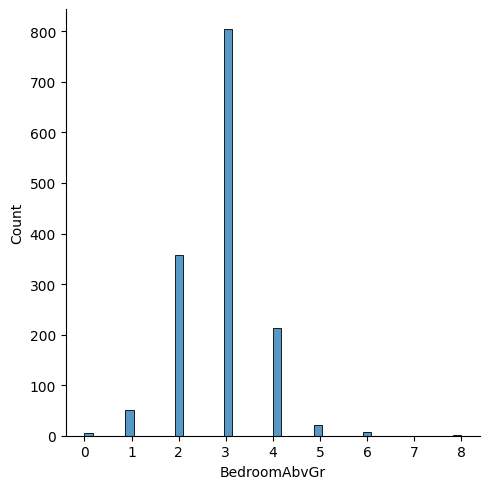

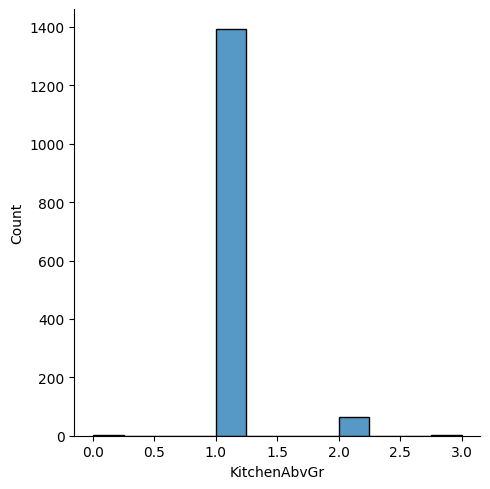

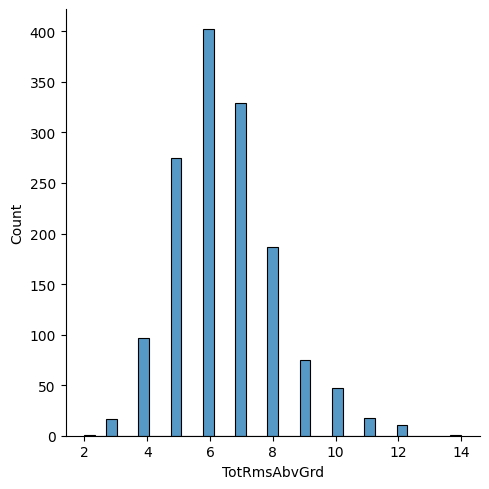

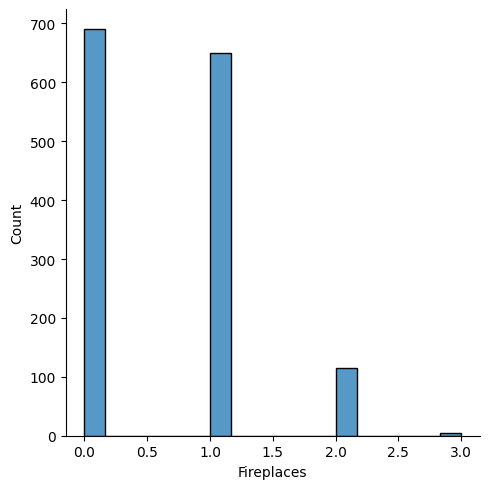

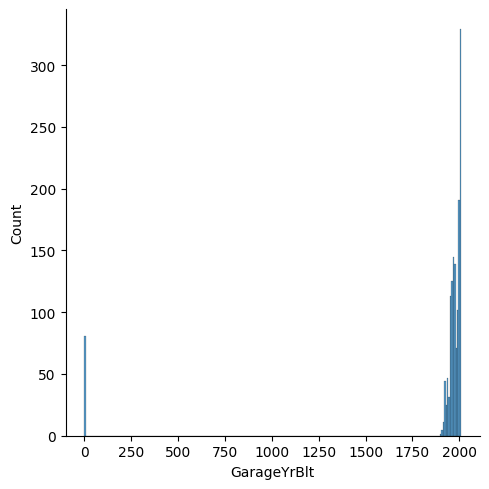

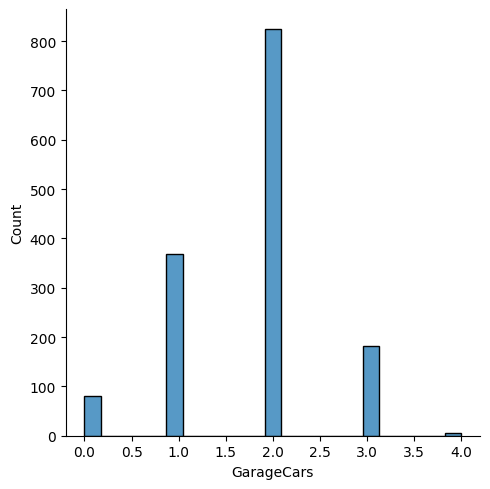

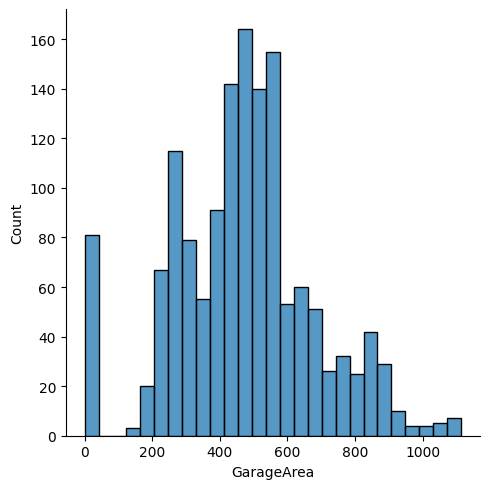

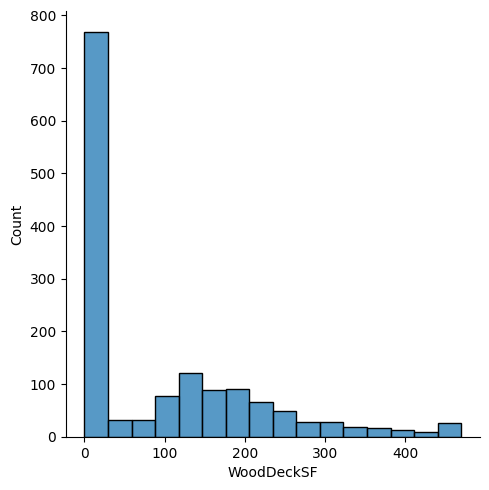

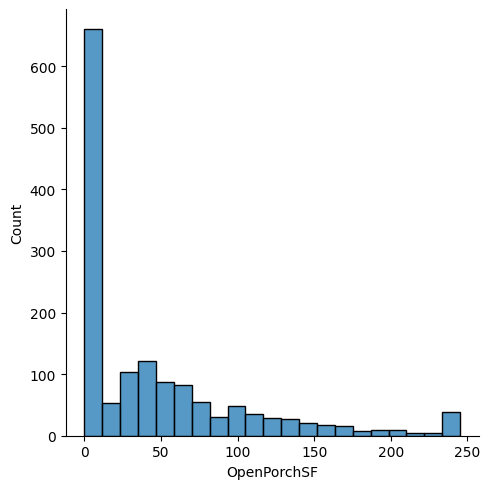

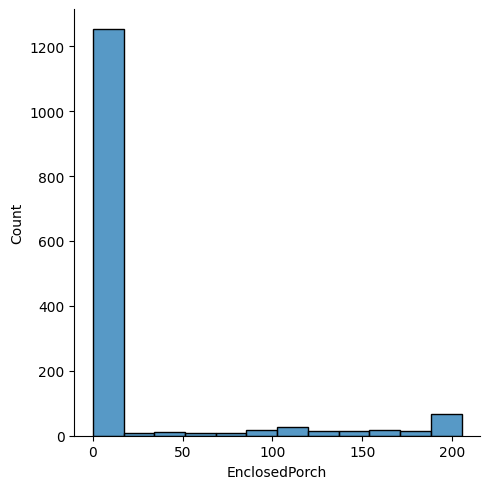

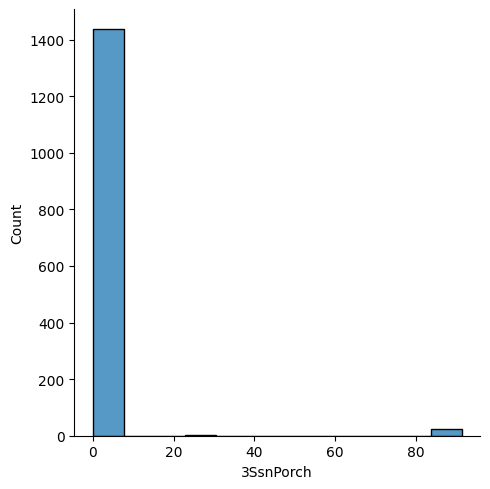

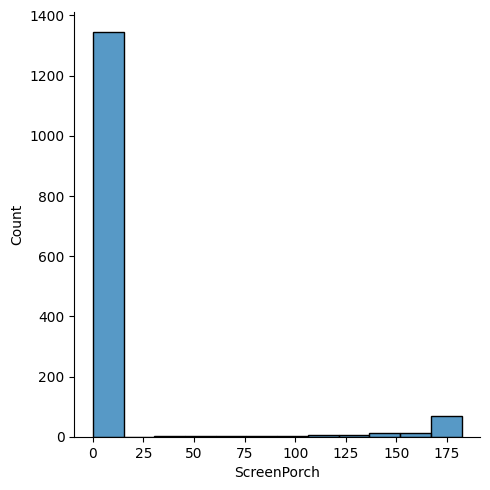

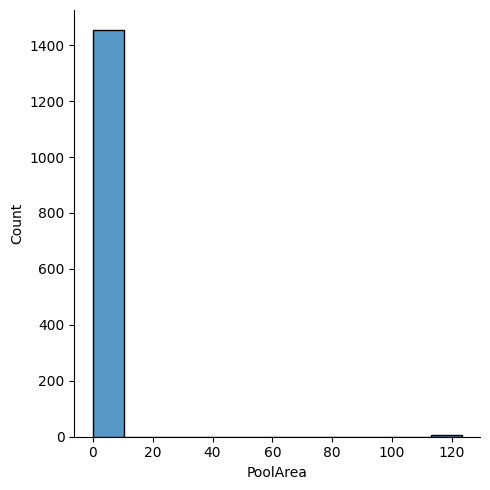

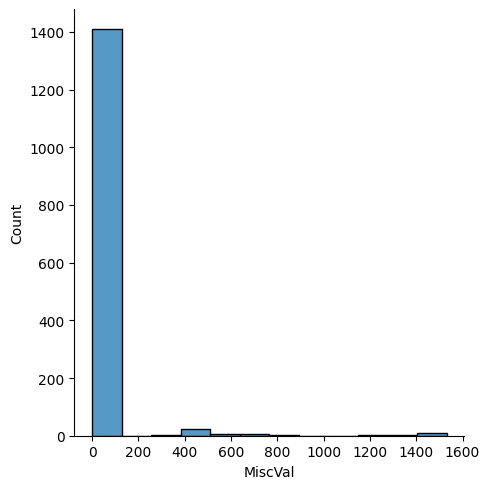

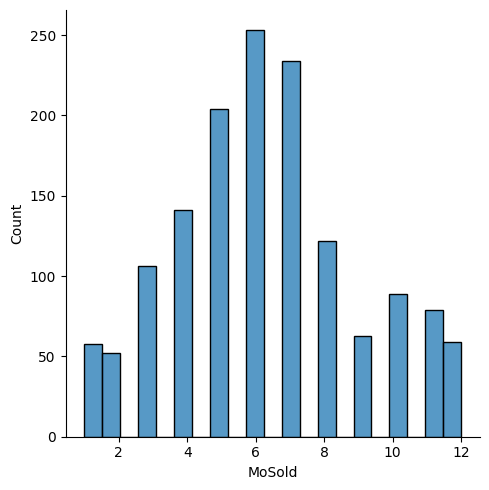

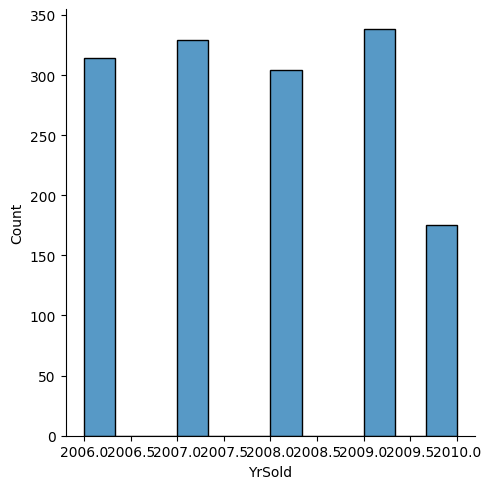

In [38]:
fig, axs = plt.subplots(6, 6, figsize=(30, 20), dpi=200)
axs = axs.ravel()

for i, col in enumerate(list(num_cols)):
    sns.displot(xs[col], ax=axs[i])

plt.show()

### encoding

## feature engineering

## model building

## evaluation

## submission